## Project 2 : How much does a LEGO brick cost?

### Brickset.com [Brickset.com] is the most established, accurate and up-to-date online LEGO database today: it contains thorough information on 15089 LEGO sets and other items released over the last 69 years.
### I contacted them and they generously offered me their complete dataset for this project.

### Apart from this dataset, I also collected data on inflation by the Federal Reserve Bank [https://www.federalreserve.gov] as well as other datasets I found online on LEGO colors, spare parts and themes [https://www.kaggle.com/rtatman/lego-database]. 


In [268]:
import pandas as pd
import matplotlib
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image 
import re
from cycler import cycler


In [257]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor'    : '#FDF6E3',
    'patch.antialiased'   : True,
    'lines.linewidth'     : 2.0,
    'lines.solid_capstyle': 'butt',
    'font.family': 'sans-serif',
    'font.style' : 'normal',
    'font.weight': 'medium',
    'axes.titlesize'      : 'large' , 
    'axes.titleweight'      : 'bold' , 
    'axes.titlepad'       : 32    ,
    'axes.labelsize'      : 12,
    'axes.labelcolor'     : '#657b83',
    'axes.facecolor'      : '#eee8d5',
    'axes.edgecolor'      : '#eee8d5',
    'axes.axisbelow'      : True,
    'axes.prop_cycle'    : cycler('color', ['#749abd', '#c6d3df', '#859900', '#9ea1a3', '#3e5569', '#eff5fb', '#268bd2', '#6c71c4']),
    'axes.grid'           : True,
    'grid.color'          : '#fdf6e3',   
    'grid.linestyle'      : '-',         
    'grid.linewidth'      : 1.5,         
    'xtick.color'         : '#657b83',
    'xtick.direction'     : 'out',
    'ytick.color'         : '#657b83',
    'ytick.direction'     : 'out',
    'text.color'          : '#657b83',
})

In [245]:
df=pd.read_csv("all_brickset.csv")
df.head()

,SetID,Number,Variant,ThemeGroup,Theme,SubTheme,Year,Name,Minifigs,Pieces,...,CARetailPrice,EURetailPrice,Image,ImageFilename,EAN,UPC,PackagingType,Availability,InstructionsCount,AdditionalImageCount
0,7326,102A,1,Vintage themes,LEGOLAND,Vehicle,1970,Front-End Loader,NaN,57.0,...,NaN,NaN,True,102A-1,NaN,NaN,{Not specified},{Not specified},0,0
1,25170,1200M,1,Basic,System,Town Plan,1957,LEGO Town Plan Wooden Board,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,{Not specified},{Not specified},0,0
2,25260,1224_1,1,Basic,System,Supplemental,1955,8 Danish Named Beams,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,{Not specified},{Not specified},0,0
3,25183,1224A,1,Basic,System,Supplemental,1955,1 x 6 and 1 x 8 Bricks,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,{Not specified},{Not specified},0,0
4,25252,1242D,1,Basic,System,Supplemental,1957,5 Danish Flags,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,{Not specified},{Not specified},0,0


In [246]:
df.drop(['SetID', 'Number', 'CARetailPrice', 'EURetailPrice','Image','ImageFilename','EAN','UPC','PackagingType','Availability','AdditionalImageCount','UKRetailPrice','Variant'], axis=1, inplace=True)

In [247]:
df.head()

,ThemeGroup,Theme,SubTheme,Year,Name,Minifigs,Pieces,USRetailPrice,InstructionsCount
0,Vintage themes,LEGOLAND,Vehicle,1970,Front-End Loader,NaN,57.0,NaN,0
1,Basic,System,Town Plan,1957,LEGO Town Plan Wooden Board,NaN,NaN,NaN,0
2,Basic,System,Supplemental,1955,8 Danish Named Beams,NaN,NaN,NaN,0
3,Basic,System,Supplemental,1955,1 x 6 and 1 x 8 Bricks,NaN,NaN,NaN,0
4,Basic,System,Supplemental,1957,5 Danish Flags,NaN,NaN,NaN,0


In [ ]:
df.Year.astype(int, inplace=True)

In [186]:
df_mean_price = df.groupby(df.Year).USRetailPrice.mean().reset_index()

In [ ]:
df_mean_price.sort_values(by= 'USRetailPrice')

In [ ]:
#keeping values from 1970 - 2018 as analysis showed major spikes before and after this periods due to the lack of information
df_mean_price = df_mean_price[df_mean_price.Year >= 1983]
df_mean_price = df_mean_price[df_mean_price.Year !=2018]
df_mean_price = df_mean_price[df_mean_price.Year !=2019]
df_mean_price.Year.astype(int, inplace=True)

In [213]:
df_mean_price.head()

,Year,USRetailPrice
32,1983,14.600000
33,1984,18.128421
34,1985,17.646667
35,1986,21.696279
36,1987,12.319667


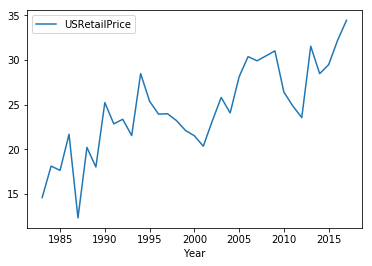

In [214]:
df_mean_price.dropna().plot(x = 'Year', y= 'USRetailPrice') #1983-2017

In [219]:
# Adjusting this for inflation
inflation = pd.read_csv('infl.csv')
inflation['CPI_Multiplier'] = inflation['CPIAUCNS'].iloc[-1] / inflation['CPIAUCNS']
inflation ['Year'] = inflation.DATE.str.extract(r'(^\d\d\d\d)')

In [228]:
inflation ['Year']= inflation.Year.astype(int, inplace=True)

In [229]:
df_wth_inlftn = pd.merge(df_mean_price, inflation,on='Year')

In [236]:
df_wth_inlftn.drop(columns = 'DATE',inplace=True)

In [238]:
df_wth_inlftn.head()

,Year,USRetailPrice,CPIAUCNS,CPI_Multiplier
0,1983,14.600000,99.600000,2.461040
1,1984,18.128421,103.883333,2.359566
2,1985,17.646667,107.566667,2.278769
3,1986,21.696279,109.608333,2.236323
4,1987,12.319667,113.625000,2.157268


In [240]:
df_wth_inlftn['AdjPrice'] = df_wth_inlftn['USRetailPrice'] * df_wth_inlftn['CPI_Multiplier'] 


In [242]:
df_wth_inlftn.head()

,Year,USRetailPrice,CPIAUCNS,CPI_Multiplier,AdjPrice
0,1983,14.600000,99.600000,2.461040,35.931184
1,1984,18.128421,103.883333,2.359566,42.775206
2,1985,17.646667,107.566667,2.278769,40.212677
3,1986,21.696279,109.608333,2.236323,48.519877
4,1987,12.319667,113.625000,2.157268,26.576823


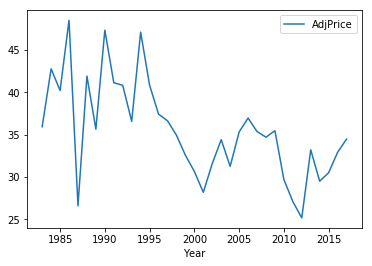

In [243]:
df_wth_inlftn.dropna().plot(x = 'Year', y= 'AdjPrice') #1983-2017 adjusted for inflation

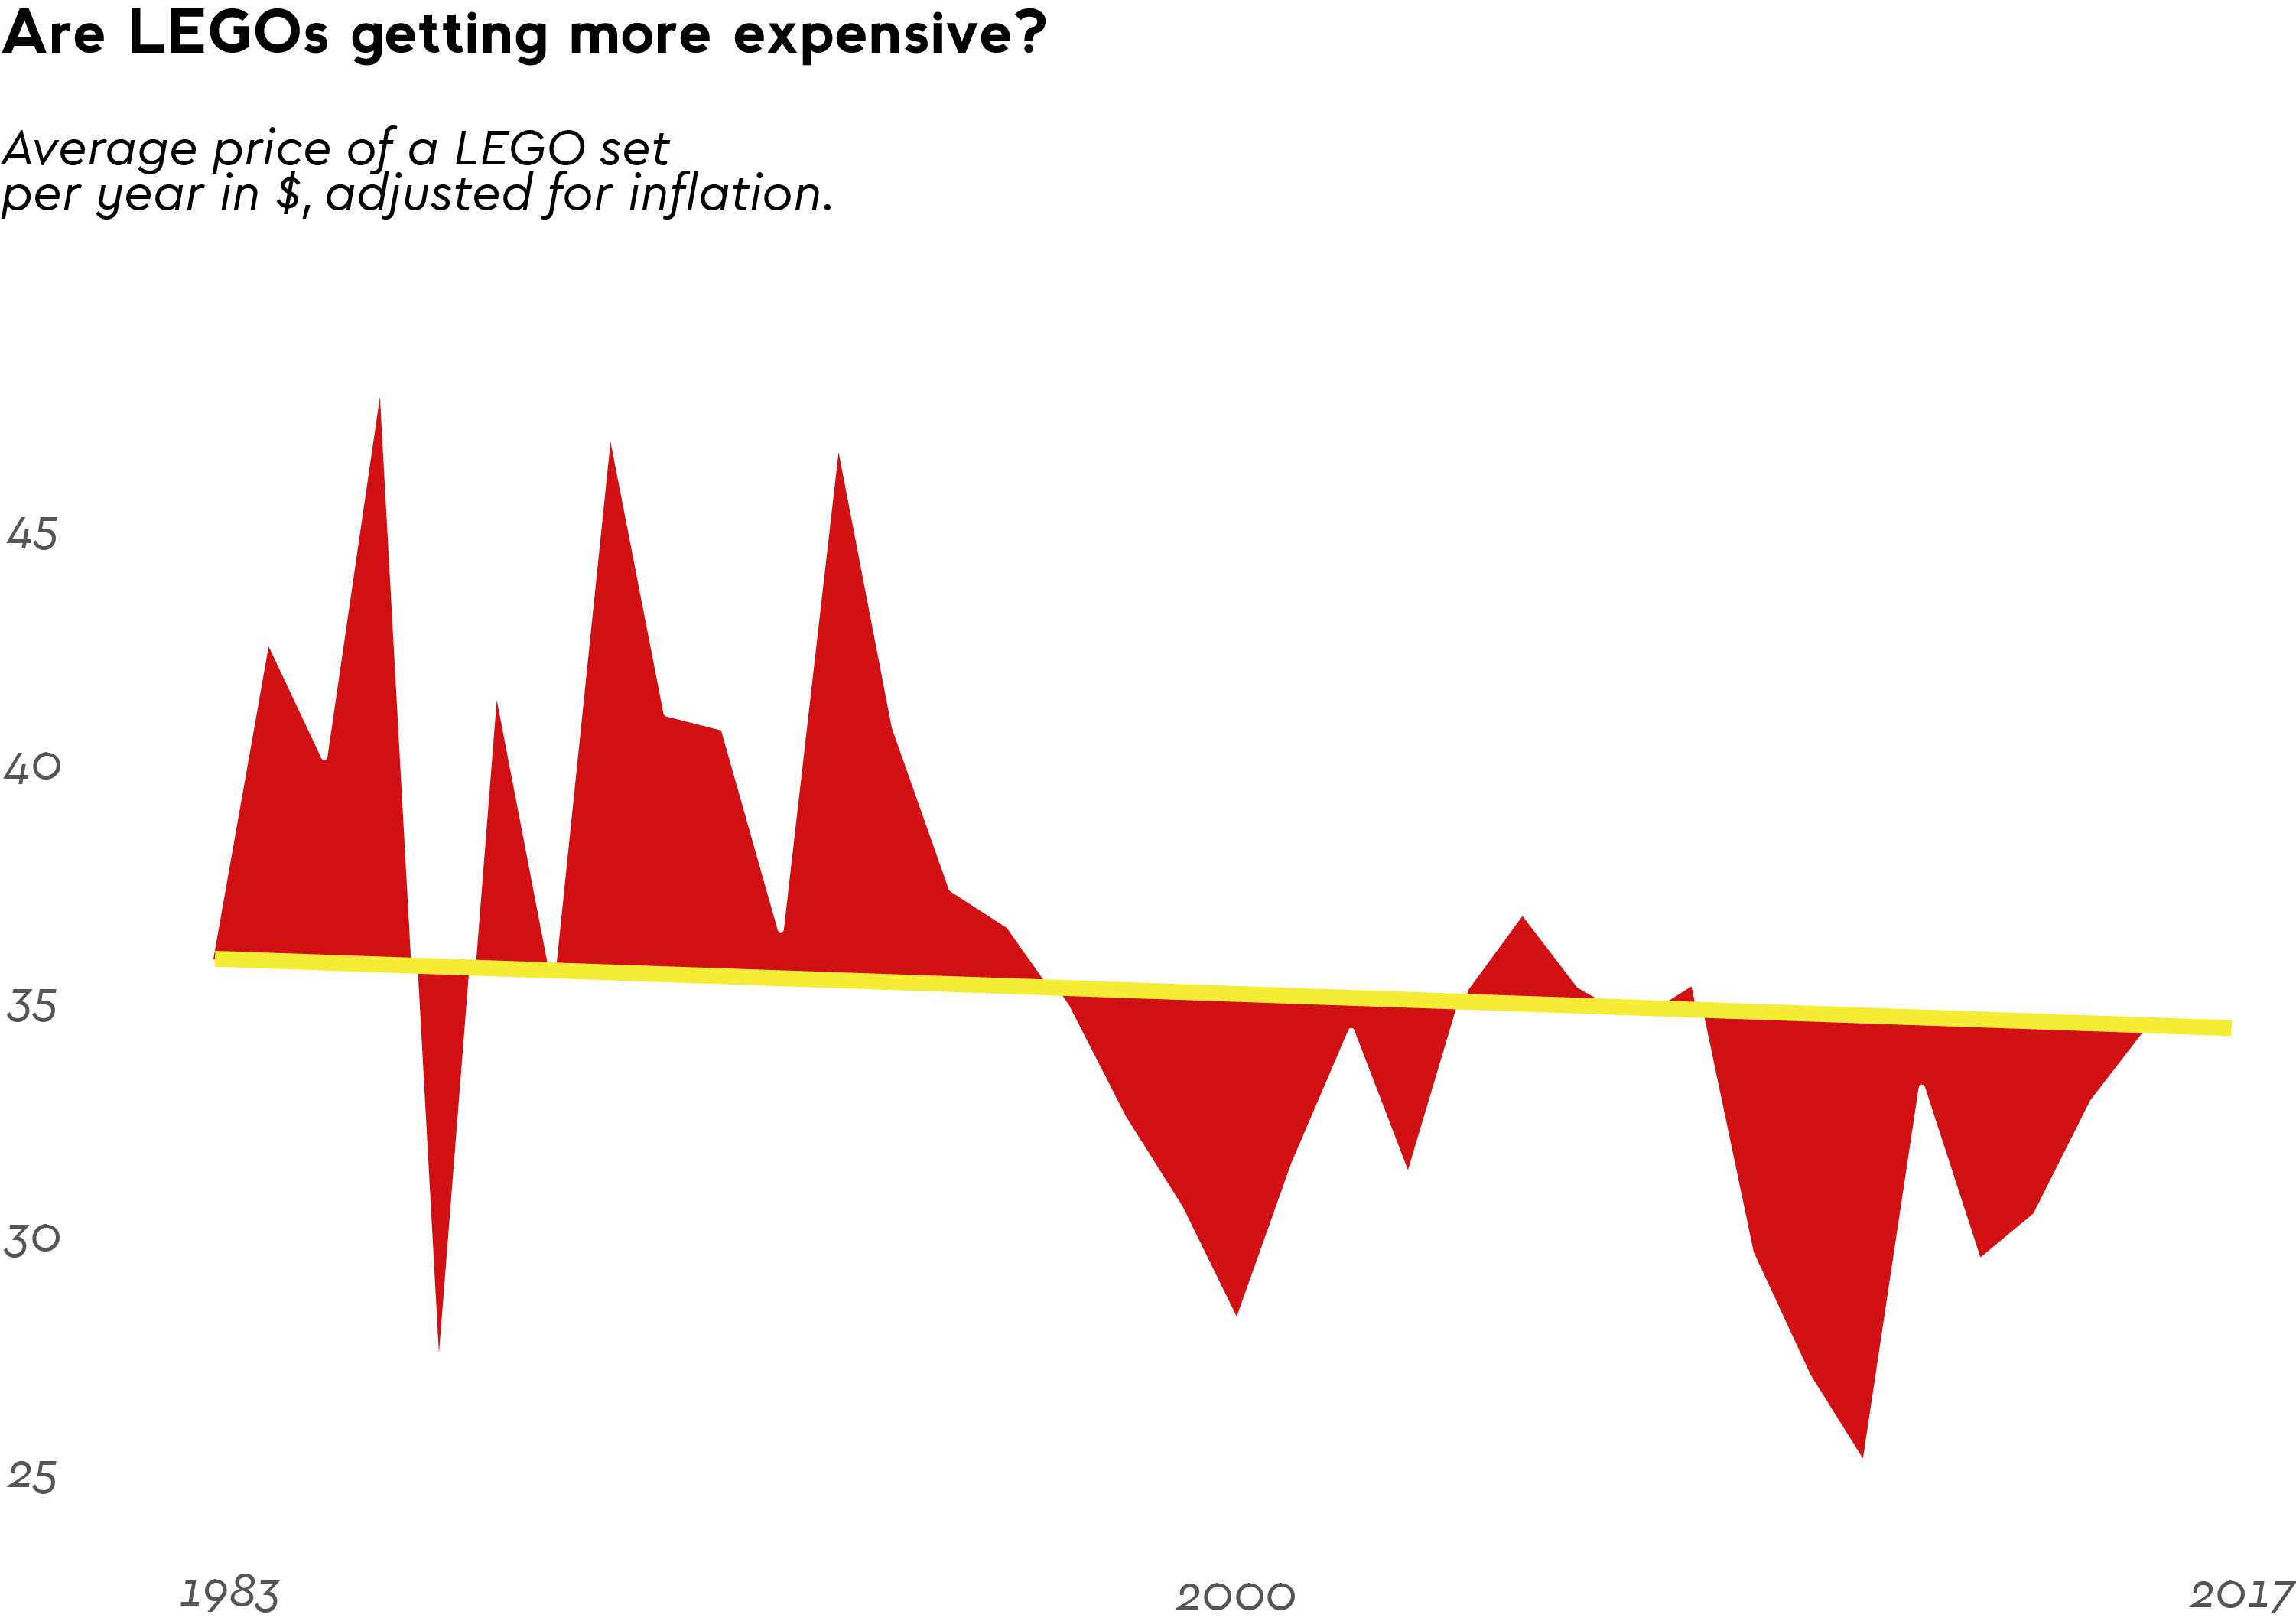

In [284]:
#Draft graph on illustrator
Image(filename='lego_prc.png')
